

# Install Package

!pip install Sastrawi !pip install plotly !pip install nltk !pip install tqdm !pip install gensim

In [ ]:
!pip install Sastrawi
!pip install plotly

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

     |████████████████████████████████| 215kB 7.6MB/s 


## Mounted Drive & Load Dataset





In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
df = pd.read_csv("/content/drive/MyDrive/Big Data Eka/Salinan Train1.csv", usecols=["label", "reviewText", "selected_text" ])

In [4]:
df

,label,reviewText,selected_text
0,2,This sound track was beautiful! It paints the ...,sound track beautiful paints senery mind well ...
1,2,I'm reading a lot of reviews saying that this ...,im reading lot reviews saying best game soundt...
2,2,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense s...
3,2,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music p...
4,2,"If you've played the game, you know how divine...",youve played game know divine music every sing...
...,...,...,...
399996,1,"Sure, this trainer was super easy to set up bu...",sure trainer super easy set holy gods loud kno...
399997,2,Had a sock aid cloth covered which is great fo...,sock aid cloth covered great hose socks tended...
399998,1,"This book is very frustrating, they put the Ja...",book frustrating put japanese text tiny letter...
399999,2,I came across this book while on vacation in a...,came across book vacation cabin minnesota read...


In [5]:
df.isnull().sum()

label            0
reviewText       0
selected_text    3
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400001 entries, 0 to 400000
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   label          400001 non-null  int64 
 1   reviewText     400001 non-null  object
 2   selected_text  399998 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [8]:
df.label.value_counts()

2    202068
1    197933
Name: label, dtype: int64

In [12]:
temp = df.groupby('label').count()['reviewText'].reset_index().sort_values(by='reviewText',ascending=False)
temp.style.background_gradient(cmap='Blues')

,label,reviewText
1,2,202068
0,1,197933


In [13]:
temp = df.groupby('label').count()['selected_text'].reset_index().sort_values(by='selected_text',ascending=False)
temp.style.background_gradient(cmap='Blues')

,label,selected_text
1,2,202066
0,1,197932


In [14]:
# untuk melihat label yang berkategory 2
df[df["label"] == 2] ["reviewText"].values[2]

'This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you\'ve played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\'s Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer\'s work (I haven\'t heard the Xenogears soundtrack, so I can\'t say for sure), and even if you\'ve never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.'

In [18]:
# untuk melihat label yang berkategory 1
df[df["label"] == 1] ["selected_text"].values[1]

'complete waste time typographical errors poor grammar totally pathetic plot add absolutely nothing im embarrassed author disappointed actually paid book'

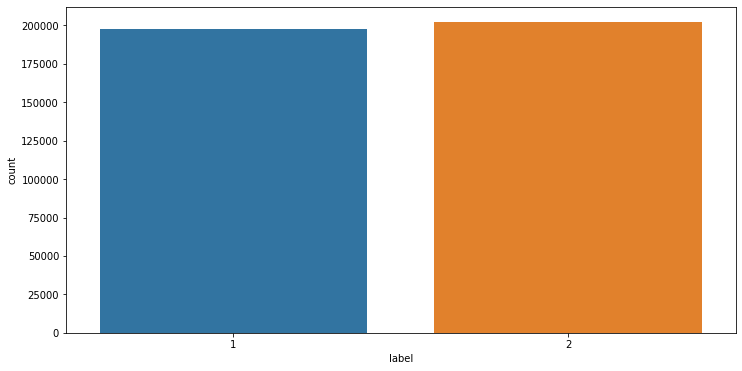

In [20]:
# menampilkan data 
plt.figure(figsize=(12,6))
sns.countplot(x='label',data=df)
#ternyata data inbalanced

In [23]:
fig = go.Figure(go.Funnelarea(
    text =temp.label,
    values = temp.selected_text,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution"}
    ))
fig.show()

In [25]:
df['explore_list'] = df['reviewText'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,1344220
1,and,805813
2,I,737380
3,a,728157
4,to,726841
5,of,623332
6,is,538641
7,this,421594
8,it,406385
9,in,342416


In [26]:
df['explore_list'] = df['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,book,214356
1,one,145093
2,like,114857
3,good,94684
4,movie,90733
5,would,89682
6,great,87910
7,read,85187
8,get,70673
9,time,69743


In [27]:
df['explore_list'] = df['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,book,214356
1,one,145093
2,like,114857
3,good,94684
4,movie,90733
5,would,89682
6,great,87910
7,read,85187
8,get,70673
9,time,69743


In [28]:
# show the missing values
num_missing_text = np.sum(df['selected_text'].isnull())
print('missing values: {}'.format(num_missing_text))

missing values: 3


### **Preprocessing**

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopword_id(text):    
  
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    #more_stopword = ['yg','ga','gak', 'tdk','nya','ada','tidak','baik']

    # Merge stopword
    data = stop_factory #+ more_stopword
    dictionary = ArrayDictionary(data)
    str = StopWordRemover(dictionary)
    text = str.remove(text)
    return text
#     return [word for word in text if word not in stopwords.words('indonesian')]

def remove_stopword_eng(text):
    return [word for word in text if word not in stopwords.words('english')]

def remove_stopword_in(text):    
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    #more_stopword = ['ada','tidak','baik','yg','ga','gak', 'tdk','nya']

    # Merge stopword
    data = stop_factory + more_stopword
    dictionary = ArrayDictionary(data)
    str = StopWordRemover(dictionary)
    text = str.remove(text)
    return text

def remove_stopword(text):
    #text = [word for word in text if word not in stopwords.words('indonesian')]
    text = [word for word in text if word not in stopwords.words('english')]
    return text

def clean_text(text):
    # lower text/case folding
    text = text.lower()
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)
    #remove puncutation
    text = text.translate(str.maketrans("","",string.punctuation))
    text = word_tokenize(text)
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    text = remove_stopword_eng(text)
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)    

#print('step 1')
# clean test dataset and stop word
#test["selected_text"] = test["reviewText"].apply(lambda x: remove_stopword_eng(x))
#test["selected_text"] = test["selected_text"].apply(lambda x: clean_text(x))

print('step 2')
# clean test dataset and stop word
#test["selected_text"] = test["reviewText"].apply(lambda x: remove_stopword_eng(x))
test["selected_text"] = test["reviewText"].apply(lambda x: clean_text(x))
print('done')

In [29]:
df.head()

,label,reviewText,selected_text,explore_list
0,2,This sound track was beautiful! It paints the ...,sound track beautiful paints senery mind well ...,"[sound, track, beautiful, paints, senery, mind..."
1,2,I'm reading a lot of reviews saying that this ...,im reading lot reviews saying best game soundt...,"[im, reading, lot, reviews, saying, best, game..."
2,2,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense s...,"[soundtrack, favorite, music, time, hands, int..."
3,2,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music p...,"[truly, like, soundtrack, enjoy, video, game, ..."
4,2,"If you've played the game, you know how divine...",youve played game know divine music every sing...,"[youve, played, game, know, divine, music, eve..."
